## Generating Sensitivity Matrix (SSM) for BioCRNpyler CRN model
This notebook uses the bioscrape toolbox and the sensitivity analysis included in the toolbox. <br>
This notebook is used to plot and save the sensitivity matrix for the model with deg-tag. <br>
Created two separate files so that they can be run in parallel as the estimation of sensitivity matrix can be computationally expensive depending on the simulation step size. <br>
More information on how to use the bioscrape's sensitivity analysis tool can be found at: <br> https://github.com/biocircuits/bioscrape/blob/master/examples/Sensitivity%20Analysis%20using%20Bioscrape.ipynb

In [28]:
## Import all the libraries 

from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model
from bioscrape.analysis import py_get_jacobian, py_get_sensitivity_to_parameter
from bioscrape.analysis import py_sensitivity_analysis

import numpy as np
import lmfit 
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import style
%config InlineBackend.figure_format = 'retina'

style.use("default")

%matplotlib inline

In [29]:
## Import the BioCRNpyler model to be analyzed 

model_degtag = Model(sbml_filename = 'BioCRNpyler_model_degtag_070824.xml')
model_no_tag = Model(sbml_filename = 'BioCRNpyler_model_no_degtag_070824.xml')

N_steps = 50
t_final = 1000
timepoints = np.linspace(0, t_final, N_steps)

tf_I = int(N_steps * 0.72) # Indice to represent 720 minutes in the simulation
tf_i = 72 # Indice to represent 720 minutes in the experimental data 

In [30]:
# Deifning the initial conditions for the CRN which were hand fitted 

model_degtag.set_species({'dna_X': 100,
 'protein_RNAP_machinery': 200.69,
 'protein_sigma_machinery': 977.63,
 'protein_NT_units': 962.85,
 'protein_Ribo_machinery': 794.8,
 'protein_AA_units0tl': 50000,
 'protein_tRNA_machinery': 580.4,
 'protein_RNAase_machinery': 72,
 'protein_Et_machinery': 563,
 'protein_protease_machinery': 252,
 'protein_unfolded_protein_degtag': 0,
 'rna_T_X':0,
 'protein_X':0,
 'cell_count_count': 6666666.67})

# m_no_deg.set_params({'r_dil__':1,
#               'k_Et__bacterial_translation':0})

model_no_tag.set_species({'dna_X': 100,
 'protein_RNAP_machinery': 200.69,
 'protein_sigma_machinery': 977.63,
 'protein_NT_units': 962.85,
 'protein_Ribo_machinery': 794.8,
 'protein_AA_units0tl': 50000,
 'protein_tRNA_machinery': 580.4,
 'protein_RNAase_machinery': 72,
 'protein_Et_machinery': 563,
 'protein_protease_machinery': 252,
 'protein_unfolded_protein_degtag': 0,
 'rna_T_X':0,
 'protein_X':0,
 'cell_count_count': 6666666.67})

In [31]:
## Simulate the model using bioscrape to visualize the model 

sol_deg = py_simulate_model(timepoints = timepoints, Model = model_degtag)
sol_no_deg = py_simulate_model(timepoints = timepoints, Model = model_no_tag)

/Users/harikrishnan/.local/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


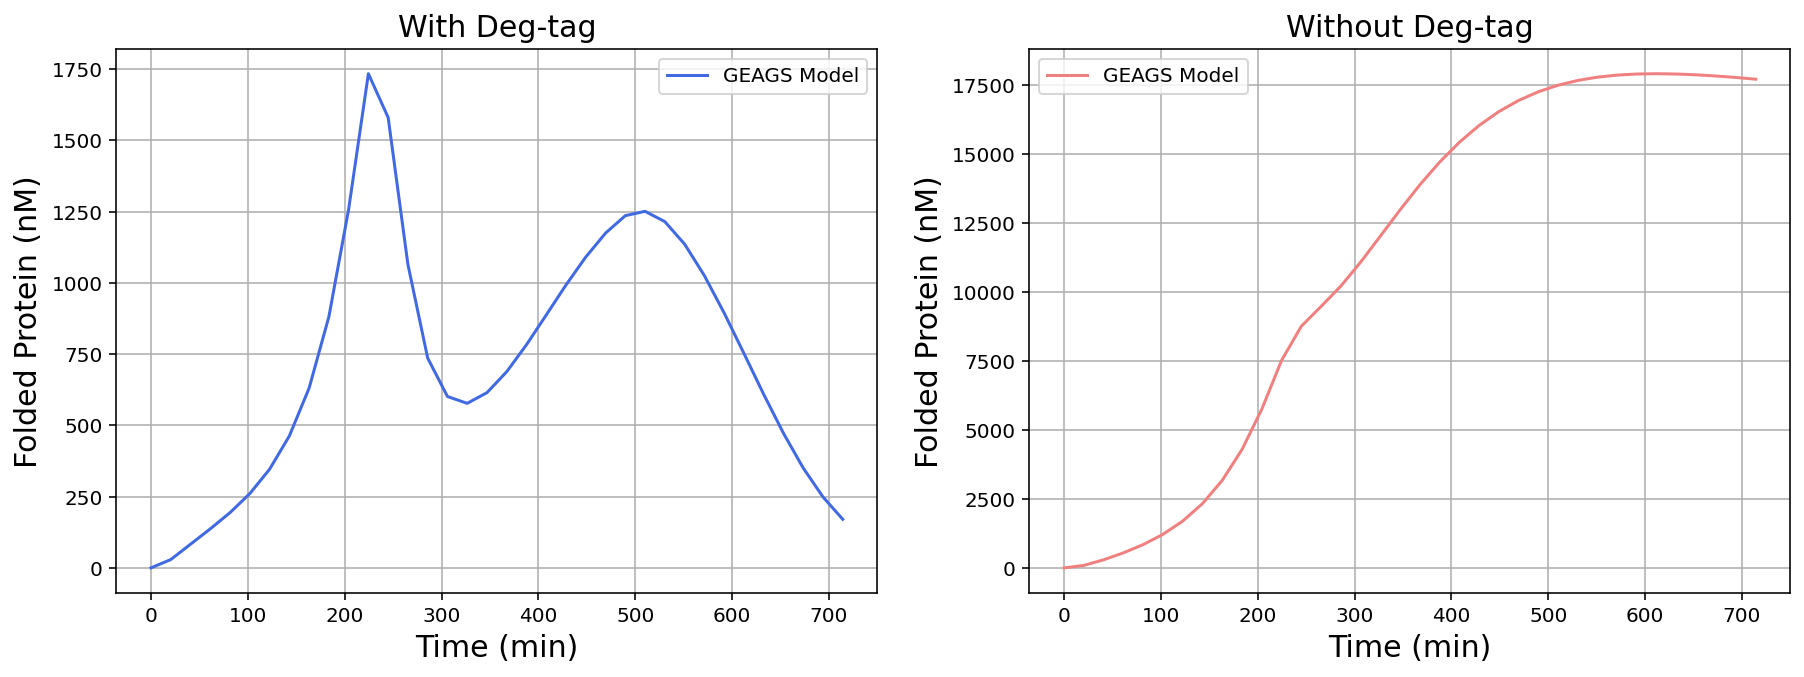

In [32]:
## Plotting the model output for sanity check 

fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.subplots_adjust(wspace = 0.2)#, hspace = 0.1)


i = 0
ax[i].plot(timepoints[:tf_I], sol_deg['protein_X'][:tf_I], label = "GEAGS Model", color = 'royalblue')
ax[i].set_xlabel('Time (min)', fontsize = 15) ; ax[i].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[i].set_title('With Deg-tag', fontsize = 15) ; ax[i].grid(True) ; ax[i].legend()

i = 1
ax[i].plot(timepoints[:tf_I], sol_no_deg['protein_X'][:tf_I], label = "GEAGS Model", color = 'lightcoral')
ax[i].set_xlabel('Time (min)', fontsize = 15) ; ax[i].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[i].set_title('Without Deg-tag', fontsize = 15) ; ax[i].grid(True) ; ax[i].legend()


In [33]:
## Run sensitivity analysis 
## Use the normalize = True argument to normalize the sensitivity matrix

SSM_deg = py_sensitivity_analysis(model_degtag, timepoints, normalize = True)

/Users/harikrishnan/.local/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/harikrishnan/.local/lib/python3.8/site-packages/bioscrape/analysis.py:244: RuntimeWarning: invalid value encountered in true_divide
  SSM_normalized[:,j,i] = np.divide(SSM[:,j,i]*params_values[j], solutions[:,i])
/Users/harikrishnan/.local/lib/python3.8/site-packages/bioscrape/analysis.py:244: RuntimeWarning: divide by zero encountered in true_divide
  SSM_normalized[:,j,i] = np.divide(SSM[:,j,i]*params_values[j], solutions[:,i])


In [34]:
# Set of codes to obtain information regarding the size of the SSM matrix, names of species and their indices to print the appropriate data

a = model_degtag.get_parameter_values() # To see how many parameters are there in the analysis 
Np = len(a)
np.shape(a), Np

((42,), 42)

In [35]:
# To visualize the names of all the species in the model 

model_degtag.get_species_list()

['dna_X',
 'protein_RNAP_machinery',
 'protein_sigma_machinery',
 'protein_NT_units',
 'rna_T_X',
 'complex_protein_RNAP_machinery_protein_sigma_machinery_',
 'complex_complex_protein_RNAP_machinery_protein_sigma_machinery__dna_X_',
 'protein_Ribo_machinery',
 'protein_AA_units0tl',
 'protein_tRNA_machinery',
 'protein_X',
 'protein_unfolded_protein_degtag',
 'protein_Et_machinery',
 'protein_peptide_chain_peptide',
 'protein_protease_machinery',
 'complex_protein_AA_units0tl_protein_Et_machinery_',
 'complex_complex_protein_AA_units0tl_protein_Et_machinery__protein_tRNA_machinery_',
 'complex_protein_AA_units0tl_protein_tRNA_machinery_',
 'complex_complex_protein_AA_units0tl_protein_tRNA_machinery__protein_Ribo_machinery_rna_T_X_',
 'complex_protein_protease_machinery_protein_unfolded_protein_degtag_',
 'complex_protein_X_protein_protease_machinery_',
 'protein_RNAase_machinery',
 'cell_count_count',
 'complex_complex_protein_RNAP_machinery_protein_sigma_machinery__dna_X_open_',
 'com

In [36]:
# To obtain the indice of protein species 

i_protein = model_degtag.get_species_list().index('protein_X')
i_protein

10

In [37]:
# To visualize the order of the parameters appearing in the sensitivity matrix

model_degtag.get_parameter_dictionary()

{'k_tx_1b__bacterial_transcription': 0.0506,
 'k_tx_1u__bacterial_transcription': 13.66,
 'k_tx_2b__bacterial_transcription': 0.000197944,
 'k_tx_2u__bacterial_transcription': 0.05461,
 'b_tx_4u__mrna_degradation': 1.0,
 'n__': 5.5,
 'c_max__logistic_cell_growth': 503666666.666667,
 'k_tx_3__bacterial_transcription': 0.00232,
 'k_rnap__bacterial_transcription': 0.024963,
 'rnap_min__bacterial_transcription': 199.4,
 'k_tl_1b__bacterial_translation': 0.453,
 'k_tl_1u__bacterial_translation': 69930.0,
 'k_tl_2__bacterial_translation': 39960.0,
 'k_tl_3__bacterial_translation': 9.958,
 'k_tl_4__bacterial_translation': 590.88,
 'k_tl_5__bacterial_translation': 138.88,
 'k_tl_6b__bacterial_translation': 0.00197,
 'k_tl_6u__bacterial_translation': 742.71,
 'k_tl_7__bacterial_translation': 3.765,
 'b_tl_7__bacterial_translation': 1.17,
 'k_tl_8__bacterial_translation': 0.1,
 'P_max__bacterial_translation': 31104.0,
 'b_tl_8__bacterial_translation': 0.5,
 'k_tRNA__bacterial_translation': 0.010

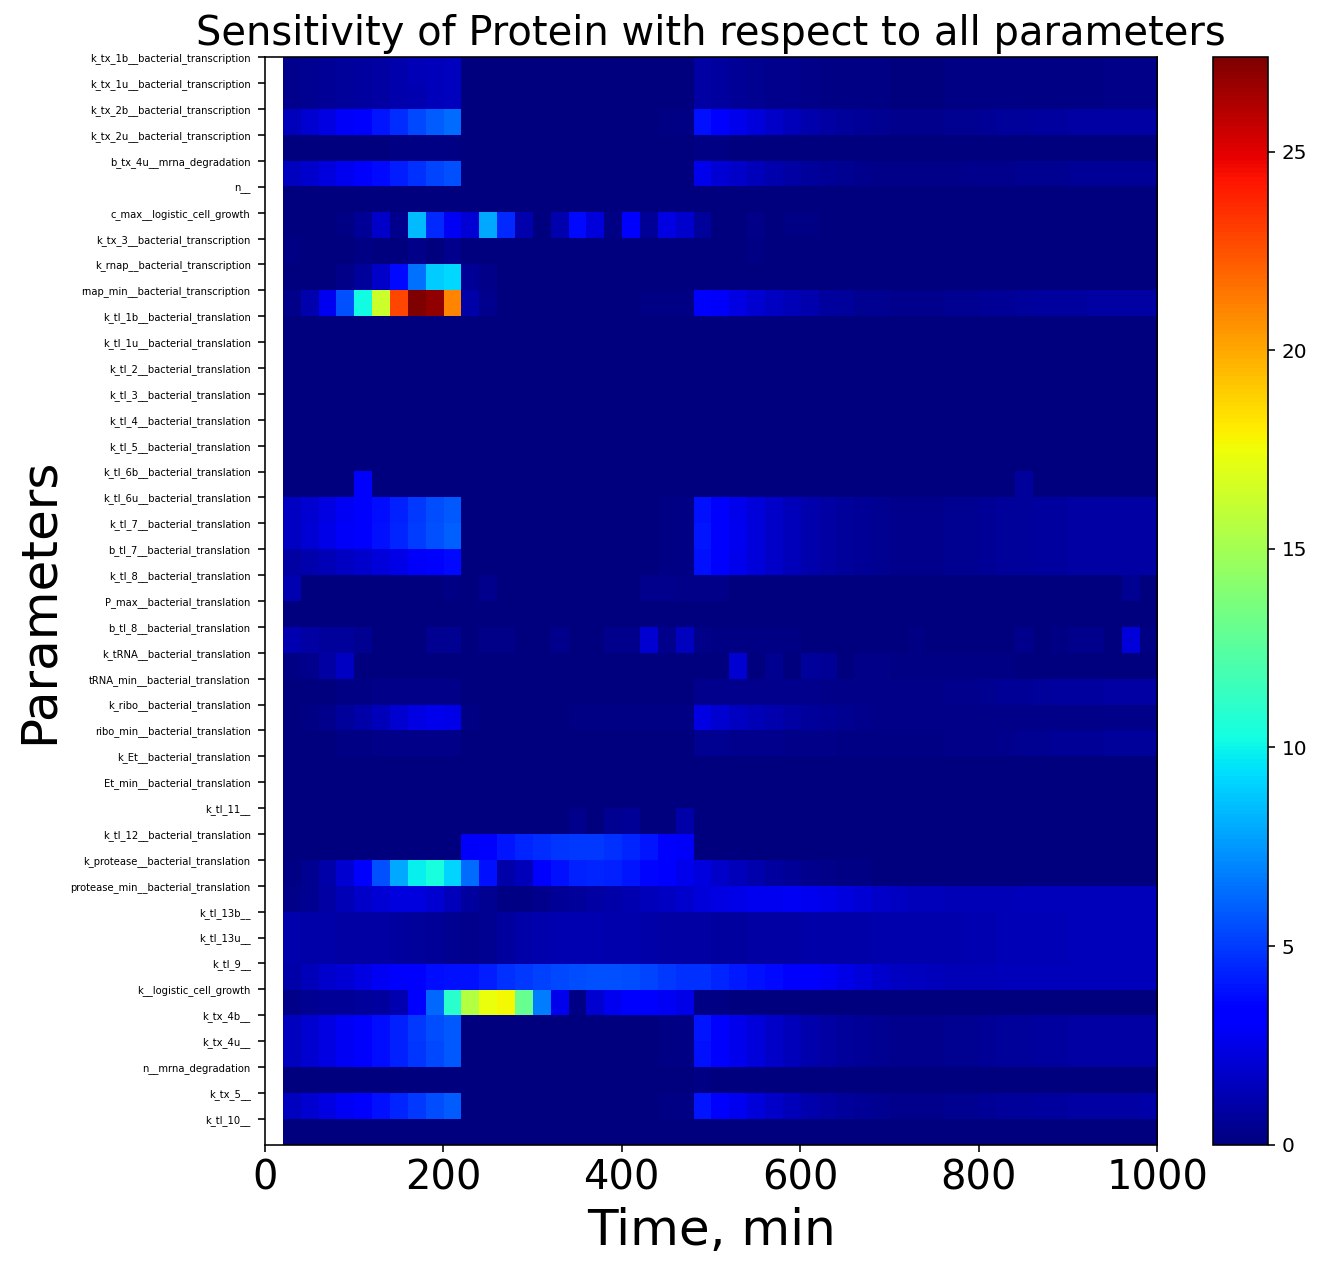

In [38]:
## Plotting the sensitivity matrix for the Protein species
## Plotting the absolute values of the sensitivity matrixc coefficients 

fig, axs = plt.subplots(1,1, figsize = (10,10), sharex = 'col')
h00 = axs.imshow(np.abs(SSM_deg[:,:,i_protein].T), cmap = 'jet', interpolation = 'nearest', aspect = 'auto', extent = [0,t_final,Np,0])
fig.colorbar(h00, ax = axs)
axs.set_ylabel('Parameters', fontsize = 25) ; axs.set_xlabel('Time, min', fontsize = 25)
#axs.yticks(list(model_degtag.get_parameter_dictionary().keys()), fontsize = 5)
axs.set_title('Sensitivity of Protein with respect to all parameters', fontsize = 20)
plt.xticks(fontsize = 20)
y_ticks = list(model_degtag.get_parameter_dictionary().keys())
plt.yticks(range(len(y_ticks)), y_ticks, rotation='horizontal', fontsize = 5);

In [40]:
# # Saving the data and exporting it for further analysis 

# np.save("SSM_deg_abs_072824.npy", np.abs(SSM_deg))